In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
pd.options.display.max_rows = 1000

In [8]:
df1 = pd.read_csv(r"C:\Users\15103\Desktop\Housing Price Project\London.csv")
df1.head(100)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
95,95,Baronsmead Road,4000000,House,3714,5,5,5,Barnes,London,SW13 9RR
96,96,Sisters Avenue,500000,Flat / Apartment,516,2,2,2,NaN,London,SW11 5SQ
97,97,Warrington Gardens,1275000,Flat / Apartment,1185,3,3,3,Little Venice,London,W9 2PZ
98,98,Pembroke Villas,4500000,House,2972,3,3,3,NaN,London,W8 6PG


In [4]:
df1.shape

(3480, 11)

In [5]:
df1.columns

Index(['Unnamed: 0', 'Property Name', 'Price', 'House Type', 'Area in sq ft',
       'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Location',
       'City/County', 'Postal Code'],
      dtype='object')

In [22]:
df1 = df1.drop(['Unnamed: 0','Property Name','House Type','No. of Receptions','Postal Code'],axis='columns')
df1.head()

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,Location,City/County,bath,bed,total_sqft,City
0,1675000,2716,5,5,Wimbledon,London,5,5,2716,London
1,650000,814,2,2,Clerkenwell,London,2,2,814,London
2,735000,761,2,2,Putney,London,2,2,761,London
3,1765000,1986,4,4,Putney,London,4,4,1986,London
4,675000,700,2,2,Putney,London,2,2,700,London


In [12]:
df1['bath'] = df1['No. of Bathrooms']
df1['bed'] = df1['No. of Bedrooms']
df1['total_sqft'] = df1['Area in sq ft']
df1['City'] = df1['City/County']

In [13]:
df2 = df1.copy()

## Creating Price Per Sqft Column

In [32]:
df1['price_per_sqft'] = df1['Price']*1.34/df2['total_sqft']

In [31]:
df1.rename(columns={"No. of Bathrooms":"bath",
                   "No. of Bedrooms":"bed",
                   "Area in sq ft":"total_sqft",
                  "City/County":"City"},inplace=True)
df1.head()

,Price,total_sqft,bed,bath,Location,City,bath,bed,total_sqft,City,price_per_sqft
0,1675000,2716,5,5,Wimbledon,London,5,5,2716,London,826.399116
1,650000,814,2,2,Clerkenwell,London,2,2,814,London,1070.024570
2,735000,761,2,2,Putney,London,2,2,761,London,1294.218134
3,1765000,1986,4,4,Putney,London,4,4,1986,London,1190.886203
4,675000,700,2,2,Putney,London,2,2,700,London,1292.142857


## Removing Non-London Locations

In [34]:
df2.City = df2.City.apply(lambda x: x.strip())
City_stats = df2.groupby('City')['City'].agg('count').sort_values(ascending=False)
City_stats

City
London                      2972
Surrey                       262
Middlesex                     78
Essex                         62
Twickenham                    12
Hertfordshire                  9
N7 6QX                         7
Thurleigh Road                 7
Fulham                         5
Wornington Road                5
Marylebone                     4
Watford                        4
Chelsea                        3
Northwood                      2
City Of London                 2
Richmond                       2
E5 8DE                         2
Wandsworth                     2
Battersea                      2
London1500                     1
Wimbledon                      1
Middx                          1
N1 6FU                         1
Oxshott                        1
Surrey Quays                   1
The Metal Works                1
Queens Park                    1
Little Venice                  1
Romford                        1
Spitalfields                   1
Thame

In [47]:
df2 = df1.loc[:,~df1.columns.duplicated()]
df2.head()

,Price,total_sqft,bed,bath,Location,City,price_per_sqft
0,1675000,2716,5,5,Wimbledon,London,826.399116
1,650000,814,2,2,Clerkenwell,London,1070.024570
2,735000,761,2,2,Putney,London,1294.218134
3,1765000,1986,4,4,Putney,London,1190.886203
4,675000,700,2,2,Putney,London,1292.142857


In [52]:
df3 = df2[df2.City == 'London']
df3.City.unique()
df3.shape

(2972, 7)

## Dimensionality Reduction

In [80]:
location_stats = df3.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
other                       821
Putney                       96
Barnes                       71
Wandsworth                   70
Wimbledon                    68
Chiswick                     57
Islington                    52
Battersea                    51
 Battersea                   43
Fulham                       41
Marylebone                   40
 Canary Wharf                34
 Fulham                      33
Hampstead                    31
Hackney                      31
 Putney                      30
Primrose Hill                29
Clerkenwell                  28
Mayfair                      24
Belgravia                    23
East Sheen                   18
Highgate                     18
Ealing                       17
South Hackney                17
 Marylebone                  16
 Wandsworth                  16
St John's Wood               15
 Westminster                 15
Notting Hill                 15
St. John's Wood              14
Prince of Wales Drive        14

In [60]:
location_stats.values.sum()

2058

In [61]:
len(location_stats[location_stats>10])

39

In [81]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

Series([], Name: Location, dtype: int64)

In [73]:
len(df3.Location.unique())

51

In [89]:
df4 = df3.copy()
df4.Location = df3.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df4.head(10)

,Price,total_sqft,bed,bath,Location,City,price_per_sqft
0,1675000,2716,5,5,Wimbledon,London,826.399116
1,650000,814,2,2,Clerkenwell,London,1070.024570
2,735000,761,2,2,Putney,London,1294.218134
3,1765000,1986,4,4,Putney,London,1190.886203
4,675000,700,2,2,Putney,London,1292.142857
5,420000,403,1,1,NaN,London,1396.526055
6,1475000,1548,4,4,NaN,London,1276.808786
7,650000,560,1,1,Fulham,London,1555.357143
8,2500000,1308,3,3,NaN,London,2561.162080
9,925000,646,2,2,NaN,London,1918.730650


In [92]:
df4.isnull().sum()

Price               0
total_sqft          0
bed                 0
bath                0
Location          914
City                0
price_per_sqft      0
dtype: int64

In [93]:
df4.shape

(2972, 7)

In [94]:
df5 = df4.dropna()
df5.isnull().sum()

Price             0
total_sqft        0
bed               0
bath              0
Location          0
City              0
price_per_sqft    0
dtype: int64

In [96]:
df5.shape

(2058, 7)

## basic outlier removal

In [100]:
df5[df5.total_sqft/df5.bed<300].head()

,Price,total_sqft,bed,bath,Location,City,price_per_sqft
30,1100000,582,2,2,other,London,2532.646048
49,725000,884,3,3,South Hackney,London,1098.981900
60,875000,1132,4,4,other,London,1035.777385
105,1000000,1154,4,4,South Hackney,London,1161.178510
175,525000,514,2,2,Wimbledon,London,1368.677043


In [101]:
df6 = df5[~(df5.total_sqft/df5.bed<300)]
df6.shape

(2004, 7)

## Outlier Removal Using Standard Deviation and Mean

In [102]:
df6.price_per_sqft.describe()

count    2004.000000
mean     1534.213341
std       815.729867
min       323.758389
25%      1064.849564
50%      1292.213862
75%      1723.278135
max      9472.701405
Name: price_per_sqft, dtype: float64

In [103]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(1522, 7)

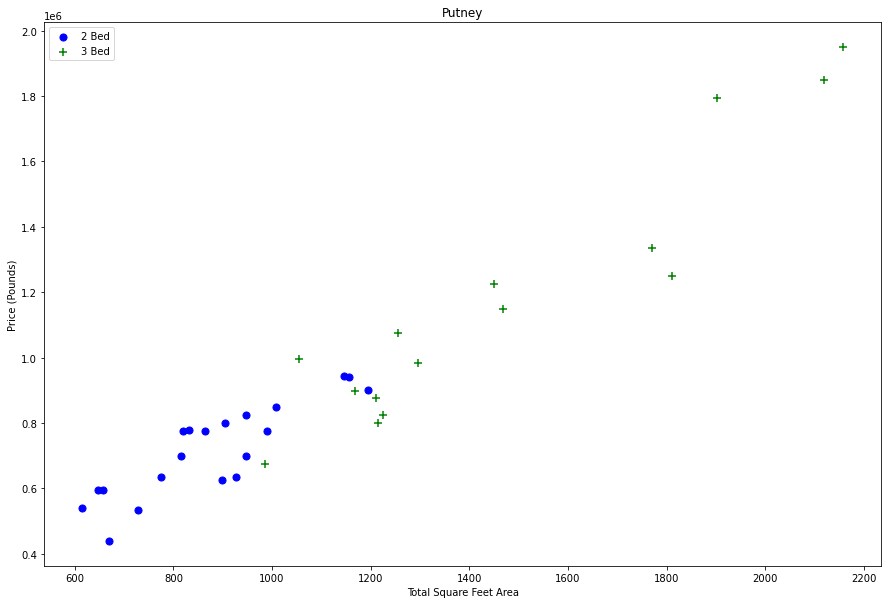

In [108]:
def plot_scatter_chart(df,Location):
    bed2 = df[(df.Location==Location) & (df.bed==2)]
    bed3 = df[(df.Location==Location) & (df.bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2.total_sqft,bed2.Price,color='blue',label='2 Bed', s=50)
    plt.scatter(bed3.total_sqft,bed3.Price,marker='+', color='green',label='3 Bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Pounds)")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df7,"Putney")

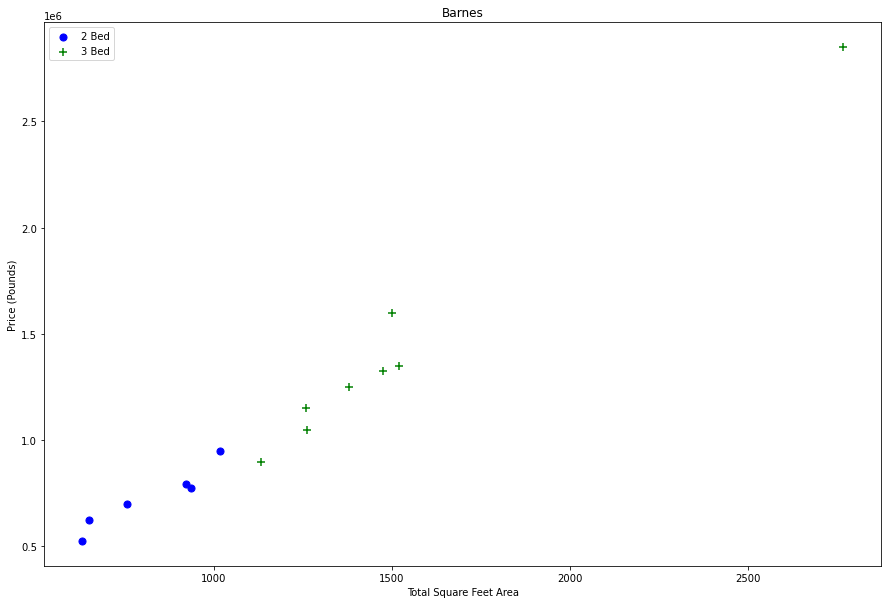

In [110]:
plot_scatter_chart(df7,"Barnes")

In [114]:
def remove_bed_outliers(df):
    exclude_indices = np.array([])
    for Location, Location_df in df.groupby('Location'):
        bed_stats = {}
        for bed, bed_df in Location_df.groupby('bed'):
            bed_stats[bed] = {
                'mean': np.mean(bed_df.price_per_sqft),
                'std': np.std(bed_df.price_per_sqft),
                'count': bed_df.shape[0]
            }
        for bed, bed_df in Location_df.groupby('bed'):
            stats = bed_stats.get(bed-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bed_df[bed_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bed_outliers(df7)
# df8 = df7.copy()
df8.shape

(1064, 7)

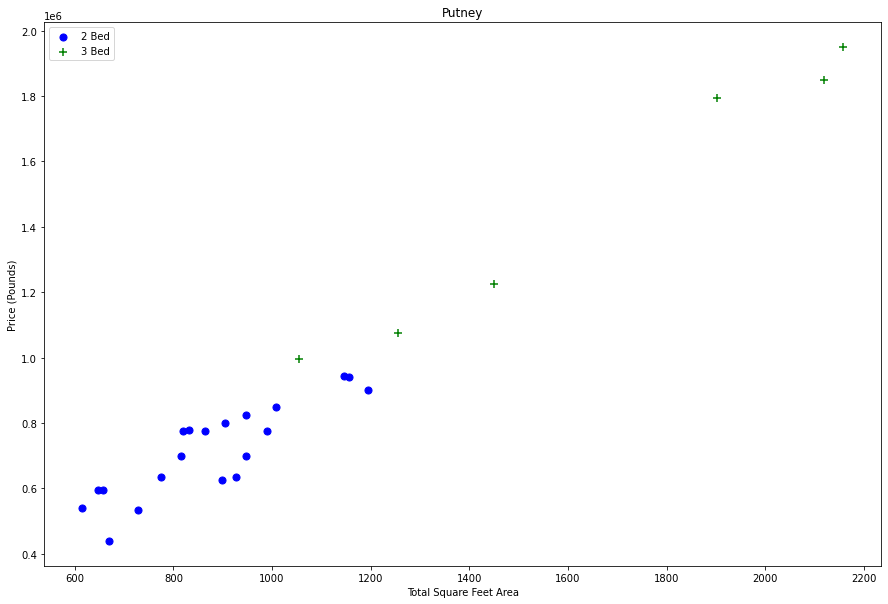

In [115]:
plot_scatter_chart(df8,"Putney")

Text(0, 0.5, 'Count')

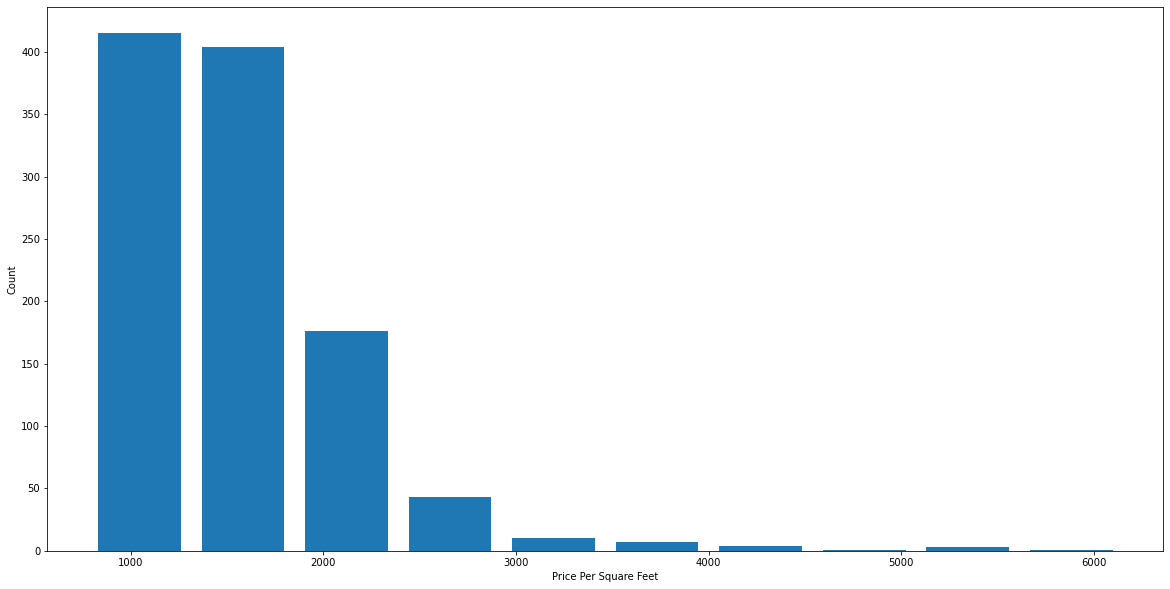

In [116]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

## One Hot Encoding for Location

In [117]:
df8.head()

,Price,total_sqft,bed,bath,Location,City,price_per_sqft
0,1300000,1299,2,2,Barnes,London,1341.031563
1,1700000,1796,3,3,Barnes,London,1268.374165
2,700000,736,1,1,Barnes,London,1274.456522
3,1150000,1349,2,2,Barnes,London,1142.327650
4,9975000,10100,10,10,Battersea,London,1323.415842


In [124]:
df9 = df8.drop(['City','price_per_sqft'],axis='columns')
df9.head()

,Price,total_sqft,bed,bath,Location
0,1300000,1299,2,2,Barnes
1,1700000,1796,3,3,Barnes
2,700000,736,1,1,Barnes
3,1150000,1349,2,2,Barnes
4,9975000,10100,10,10,Battersea


In [125]:
dummies = pd.get_dummies(df9.Location)
dummies.head(3)

,Barnes,Battersea,Canary Wharf,Chiswick,Earls Court,Fulham,Hampstead,Marylebone,Putney,Shoreditch,...,Prince of Wales Drive,Putney,Regent's Park,Shoreditch,South Hackney,St John's Wood,St. John's Wood,Wandsworth,Wimbledon,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,Price,total_sqft,bed,bath,Location,Barnes,Battersea,Canary Wharf,Chiswick,Earls Court,...,Primrose Hill,Prince of Wales Drive,Putney,Regent's Park,Shoreditch,South Hackney,St John's Wood,St. John's Wood,Wandsworth,Wimbledon
0,1300000,1299,2,2,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1700000,1796,3,3,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,700000,736,1,1,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1150000,1349,2,2,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9975000,10100,10,10,Battersea,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df11 = df10.drop('Location',axis='columns')
df11.head(2)

,Price,total_sqft,bed,bath,Barnes,Battersea,Canary Wharf,Chiswick,Earls Court,Fulham,...,Primrose Hill,Prince of Wales Drive,Putney,Regent's Park,Shoreditch,South Hackney,St John's Wood,St. John's Wood,Wandsworth,Wimbledon
0,1300000,1299,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1700000,1796,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building A Model

In [122]:
df11.shape

(1064, 52)

In [128]:
X = df11.drop(['Price'],axis='columns')
X.head()

,total_sqft,bed,bath,Barnes,Battersea,Canary Wharf,Chiswick,Earls Court,Fulham,Hampstead,...,Primrose Hill,Prince of Wales Drive,Putney,Regent's Park,Shoreditch,South Hackney,St John's Wood,St. John's Wood,Wandsworth,Wimbledon
0,1299,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1796,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,736,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1349,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10100,10,10,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
y = df11.Price
y.head()

0    1300000
1    1700000
2     700000
3    1150000
4    9975000
Name: Price, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [135]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9040477436811375

## Using K Fold cross validation to measure accuracy of LinearRegression Model

In [136]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=30)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90404774, 0.93616426, 0.92097351, 0.9454671 , 0.9077344 ])

## Finding Best Model Using GridSearchCV

In [138]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=30)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.922877,{'normalize': False}
1,lasso,0.922878,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.857069,"{'criterion': 'mse', 'splitter': 'best'}"


## Test the Model

In [141]:
def predict_price(Location,sqft,bath,bed):    
    loc_index = np.where(X.columns==Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bed
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [142]:
predict_price('Putney',1000, 2, 2)

629447.2420681552

In [170]:
predict_price('Ealing',1000, 2, 2)

303651.2420681552

In [178]:
predict_price('Wimbledon',1500,2,2)

1297711.2420681552

## Tested Model to Pickle File

In [187]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [191]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [192]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 144D-2F58

 Directory of C:\Users\15103\Personal Projects\Housing Price Prediction

01/28/2022  11:09 PM    <DIR>          .
01/28/2022  11:09 PM    <DIR>          ..
01/28/2022  04:43 PM    <DIR>          .ipynb_checkpoints
01/28/2022  10:46 PM             1,286 banglore_home_prices_model.pickle
01/28/2022  11:12 PM               751 columns.json
01/28/2022  04:06 PM           445,530 Housing Price.ipynb
01/28/2022  11:09 PM           158,348 London Housing Price Prediction.ipynb
01/28/2022  10:45 PM             1,286 london_home_prices_model.pickle
               5 File(s)        607,201 bytes
               3 Dir(s)  577,739,476,992 bytes free
